In [1]:
# Preprocessing
#Loading the images from the Dataset.
# 1. Resizing the images.
# 2. Flattening the images.

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/home/dhairya2000/Downloads/archive/data'
CATEGORIES = ['with_mask','without_mask']

for category in CATEGORIES:
    
    class_num = CATEGORIES.index(category) # Label Encoding the values
    path = os.path.join(DATADIR,category) # Create path to use all the images

    for img in os.listdir(path):
        #print(os.path.join(path,img))
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)

        img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
        #plt.imshow(img_resized)
        #plt.show()
        #print(img_resized.shape)

        flat_data.append(img_resized.flatten())
        #print(img_resized.flatten().shape)
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


<BarContainer object of 2 artists>

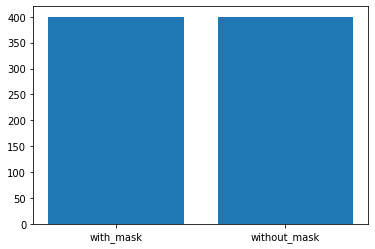

In [2]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [3]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target, test_size=0.3,random_state=109)

In [4]:
#Feeding the hyperparameters of SVM model using GridSearchCV
# & finding the optimal values of the hyperparameters


from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [5]:
print(clf.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [6]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
accuracy_score(y_pred,y_test)

0.9791666666666666

In [9]:
confusion_matrix(y_pred,y_test)

array([[111,   1],
       [  4, 124]])

In [10]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [14]:
model = pickle.load(open('img_model.p','rb'))

Enter your URL/home/dhairya2000/Downloads/dhairya-varshney-min.png
(500, 500, 4)
 PREDICTED OUTPUT: without_mask


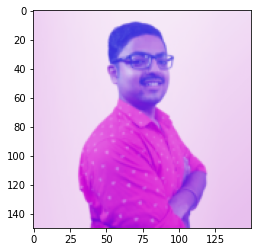

In [15]:
# Testing a brand new Image1
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your URL/home/dhairya2000/Documents/dhairya-with-mask.jpeg
(1032, 774, 3)
 PREDICTED OUTPUT: with_mask


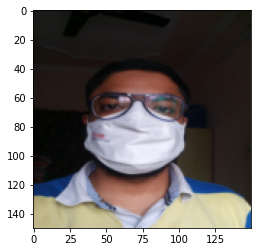

In [16]:
# Testing a brand new Image2
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')